# Motherhood in the workforce_EDA

One of the societal norms is for people to have kids as they get older. Women seem to carry most of the costs of family. There have also been multiple studies proving that gender pay gap exists. Is gender the main variable for the gender pay gap, or are there other factors, such as family, that play into it? With that in mind, are there characteristics of companies that are more friendly towards woman, particularly those with families?

This notebook focuses on men and women in the STEM field; those with and without children.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline 

In [2]:
#read file and remove null values
df = pd.read_csv('highered_00005.csv', na_values=[96, 99, 98, 9996, 9998, 9999, 999996, 999998, 999999, 9999998, 9999999])
df['CHTOT'] = df['CHTOT'].fillna(0)
df['CHFAM'] = df['CHFAM'].fillna(0)

In [3]:
#use string categorical data to replace numerical data
gen_map = {1:'Female', 2:'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

race_map = {1:'Asian', 2:'White', 3:'other minorities', 4:'Other'}
df['RACE'] = df['RACETH'].map(race_map)

deg_map = {1:'Bachelors',2:'Masters', 3:'Doctorate', 4:'Professional'}
df['DEGREE'] = df['DGRDG'].map(deg_map)

LF_map = {1: 'Employed', 2: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)
df['LFSTATS'] = df['LFSTATS'].replace(3,np.NaN)

ES_map = {1:'2 yr college',2:'4 yr college',3:'Government',4:'Industry',5:'Non_US government'}
df['EMSECS'] = df['EMSEC'].map(ES_map)

new_map = {0:'NO', 1:'YES'}
df['NEWBUSS'] = df['NEWBUS'].map(new_map)

work_map = {1:'RND',2:'Teaching',3:'Admin',4:'Computer apps', 5:'Other'}
df['WORK'] = df['WAPRSM'].map(work_map)

sup_map = {0:'No',1:'Yes'}
df['SUPERVISORY'] = df['SUPWK'].map(sup_map)

change_map = {0:'No',1:'Yes'}
df['FAMILY'] = df['CHFAM'].map(change_map)

In [4]:
#drop irrelevant columns
df = df.drop(['SURID', 'SAMPLE', 'GENDER', 'RACETH', 'DGRDG', 'EMSEC', 'NEWBUS','WAPRSM', 'SUPWK', 'CHFAM'], axis=1)

In [5]:
#quick overview of dataframe
df.head()

,PERSONID,YEAR,WEIGHT,AGE,CHTOT,LFSTAT,EMSIZE,SALARY,GENDERS,RACE,DEGREE,LFSTATS,EMSECS,NEWBUSS,WORK,SUPERVISORY,FAMILY
0,50000030000000003,2003,372.6047,47,1.0,1,3.0,35000.0,Female,White,Bachelors,Employed,2 yr college,NO,Teaching,Yes,No
1,50000030000000004,2003,341.7484,66,0.0,1,1.0,66000.0,Male,White,Bachelors,Employed,Industry,NO,RND,Yes,No
2,50000030000000005,2003,522.5629,60,0.0,1,6.0,102000.0,Female,White,Bachelors,Employed,Industry,NO,Admin,Yes,No
3,50000030000000006,2003,135.0212,30,0.0,1,8.0,81000.0,Male,White,Masters,Employed,Industry,NO,RND,Yes,No
4,50000030000000104,2003,907.4463,68,0.0,3,NaN,NaN,Female,White,Masters,NaN,NaN,NaN,NaN,NaN,No


In [6]:
#verify that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206703 entries, 0 to 206702
Data columns (total 17 columns):
PERSONID       206703 non-null int64
YEAR           206703 non-null int64
WEIGHT         206693 non-null float64
AGE            206703 non-null int64
CHTOT          206703 non-null float64
LFSTAT         206703 non-null int64
EMSIZE         176857 non-null float64
SALARY         176857 non-null float64
GENDERS        206703 non-null object
RACE           206703 non-null object
DEGREE         206703 non-null object
LFSTATS        182745 non-null object
EMSECS         176857 non-null object
NEWBUSS        176857 non-null object
WORK           176857 non-null object
SUPERVISORY    176857 non-null object
FAMILY         206703 non-null object
dtypes: float64(4), int64(4), object(9)
memory usage: 26.8+ MB


In [7]:
#a dataframe for 2003 survey only
df_2003 = df[df['YEAR'] == 2003]

#a datafram for 2013 survey only
df_2013 = df[df['YEAR'] == 2013]

#a dataframe for bachelor, masters, doctorate, and professional degrees 
df_bachelor = df[(df['DEGREE'] == 'Bachelors')]
df_ma = df[(df['DEGREE'] == 'Masters')]
df_dr = df[df['DEGREE'] == 'Doctorate']
df_prof = df[(df['DEGREE'] == 'Professional')]

#a datafram for those with children
df_child = df[df['CHTOT']!=0]

# Exploratory Data Analysis

# Question 1: How is salary distributed across age?

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


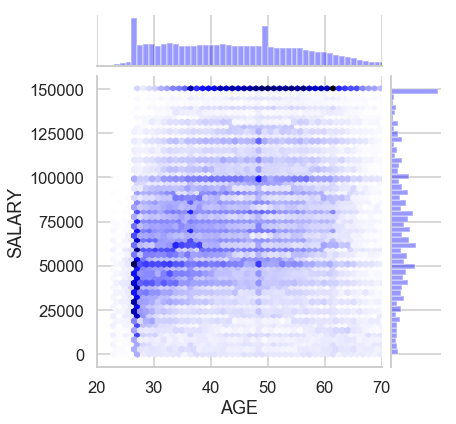

In [8]:
#plot salary against age to view its distribution
sns.jointplot('AGE', 'SALARY', 
              data=df, kind='hex', 
              space=0.2, color='b', 
              xlim={20, 70})

Based on the graph above, we see the following:

1. Age distributes evenly between approximately 30 to 60 then tapers off into a tail.
2. Salary apppears to be bimodal with a sharp peak at 150,000 then a slight one at approximately 60,000.
3. There seems to be a positive correlation between salary and age. As one gets older, one is more likely to make more money.
4. Salary seems to increase at about age 50 then tapers down.

# Question 2: How is salary distributed between men and women?

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

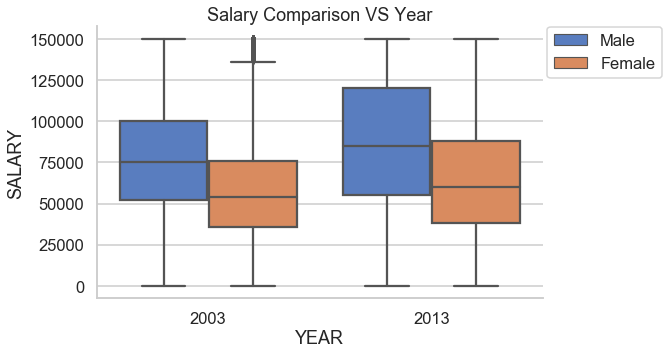

In [9]:
#bar plot of gender and salary between a 10 year gap 
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df, y = 'SALARY', 
            x = 'YEAR', hue = 'GENDERS',
            hue_order=['Male','Female'], 
            palette="muted", ax=ax)
sns.despine()
plt.title('Salary Comparison VS Year')
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.tight_layout

From the barplots, we see the disparity in salary between men and women within the ten years gap. At initial glance we see that men get paid more than women. In 2003 and 2013, we see that Q3 salary for women was barely median salary for men. In 2003, we see that salary for women is skewed whereas salary for men was more symmetric. In comparison, 2013 shows that salary for men and women are skewed in opposite direction. Obviously change in salary increase favored men.

# Question 3: How is salary distributed across different degrees?

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

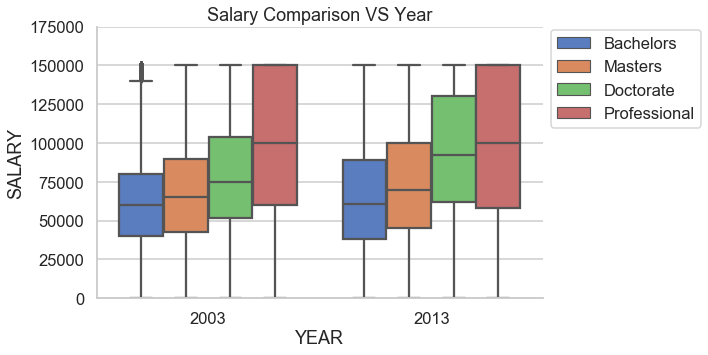

In [10]:
#box plot of salary and degrees within 10 year gap
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df, y = 'SALARY', x = 'YEAR', 
            hue = 'DEGREE',
            hue_order=['Bachelors','Masters', 'Doctorate', 'Professional'], 
            palette="muted", ax=ax)
sns.despine()
plt.title('Salary Comparison VS Year')
plt.ylim(0,175000)
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.tight_layout

According to the boxplot above, the higher one's degree is, the more money one make. Having a profession degree gives you median salary of 6 figures; however, within the past 10 years, there has been no change. Within the 10 years difference, you see an increase in median salary between bachelors, masters, and doctorate degrees.

# Question 4: How is salary distributed across degrees for men and women?

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


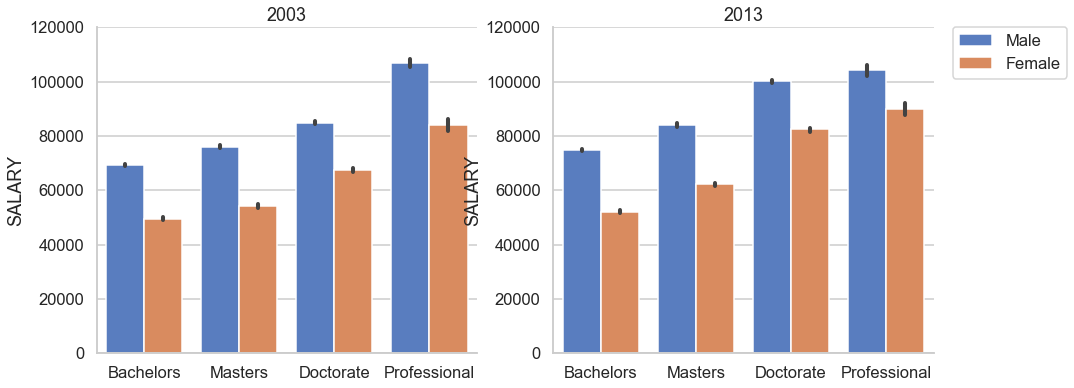

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
degree_order = ['Bachelors', 'Masters', 'Doctorate', 'Professional']

#Compare and plot the SALARY of degrees and genders from year 2003 
sns.barplot(data=df[df['YEAR']==2003], y = 'SALARY', 
            x = 'DEGREE', hue = 'GENDERS',
            hue_order=['Male','Female'], 
            palette="muted", order=degree_order, ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylim([0,120000])


#Compare and plot the SALARY of degrees and genders from year 2013 
sns.barplot(data=df[df['YEAR']==2013], y = 'SALARY', 
            x = 'DEGREE', hue = 'GENDERS', 
            hue_order=['Male','Female'], palette="muted", 
            order=degree_order, ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('2013')
axs[1].set_xlabel('')
axs[1].set_ylim([0,120000])
sns.despine()

In the above barplot, we see that women consistently make less than men with the same respective degrees. Now that we've established that overall women make less money than men despite having the same degrees, we will look at whether having children affects this salary difference.

# Question 5: What is the salary distribution men and women with or without children?

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


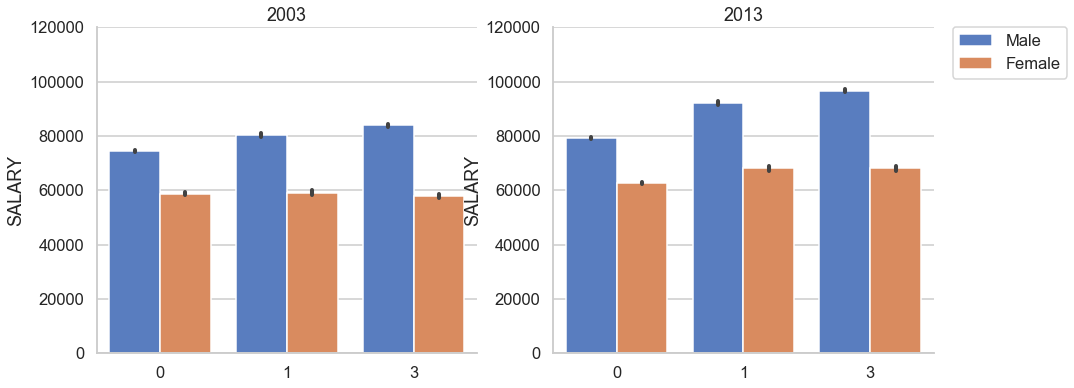

In [12]:
child_order = [0, 1, 3]

fig, axs = plt.subplots(ncols=2, figsize=(15,6))

#Compare and plot the salary of number of children and genders from year 2003
sns.barplot(data=df[df['YEAR']==2003], y = 'SALARY', 
            x = 'CHTOT', hue = 'GENDERS',
            hue_order=['Male','Female'], 
            palette="muted", order=child_order, 
            ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylim([0,120000])


#Compare and plot the SALARY of number of children and genders from year 2013 
sns.barplot(data=df[df['YEAR']==2013], y = 'SALARY', 
            x = 'CHTOT', hue = 'GENDERS', 
            hue_order=['Male','Female'], 
            palette="muted", order=child_order,
            ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('2013')
axs[1].set_xlabel('')
axs[1].set_ylim([0,120000])
sns.despine()

Women with or without children still continue to make less than men with or without children. It looks like those with more children make more money; which makes sense if we take into consideration how salary increases with age. Those who have children tend to be older. The interesting thing here is the fact that there isn't a huge increase for women as they go from no children to more children. If we compare 2003 and 2013, we see that there is a significant increase in men who had no children to men with 2 or more. Whereas for women, there is only a slight increase. It looks like having children does not hinder men from increasing in salary. 

# Question 6: What percent of men and women with children work in specific employments?

In [13]:
#group df of people with children by gender percentage then melt to modify dataframe
df_job_gender = df_child.groupby('EMSECS')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_job_gender_melt = pd.melt(df_job_gender, id_vars ='EMSECS')

In [14]:
job_order = ['2 yr college', '4 yr college', 'Government', 'Industry']

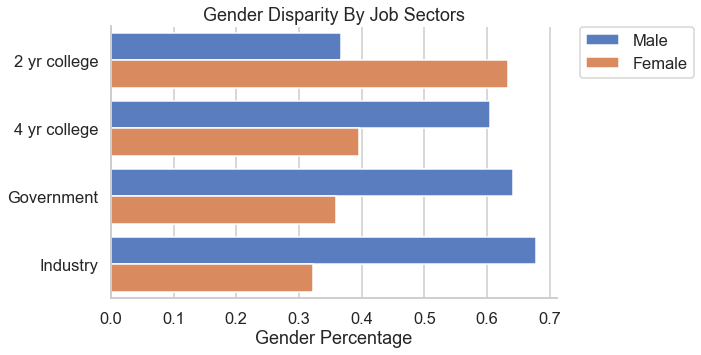

In [15]:
#Compare and plot the gender percentage in different job sectors.
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(y='EMSECS', x='value', 
            data=df_job_gender_melt, 
            hue='GENDERS', hue_order=['Male','Female'], 
            ax=ax, order=job_order, palette="muted")
plt.title('Gender Disparity By Job Sectors')
plt.xlabel('Gender Percentage')
plt.ylabel('')
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

More women with children work in 2 year colleges. This is most probably because scheduling and responsibilities allow for more time with children. In comparison, more men with children work in industries.

# Question 7: What is the salary distribution across job fields?

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

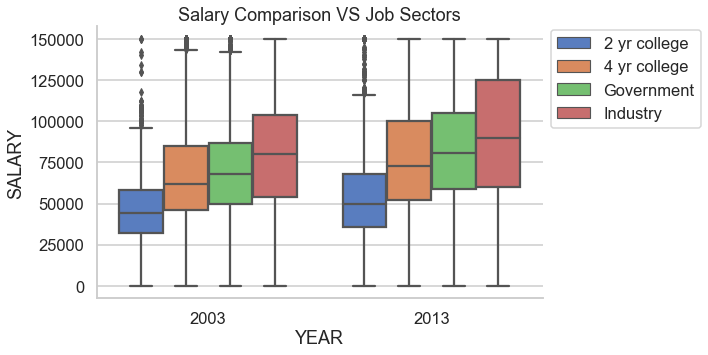

In [16]:
#Plot salary distribution by job sectors
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df_child, 
            y = 'SALARY', x = 'YEAR', 
            hue = 'EMSECS',hue_order=['2 yr college', '4 yr college', 'Government', 'Industry'], 
            palette="muted", ax=ax)
sns.despine()
plt.title('Salary Comparison VS Job Sectors')
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.tight_layout

Across the years, we see that 2 yr college sectors pay the least amount and industry sectors pay the most amount. Since this is where most women with children work at, this also helps shed some light on the pay gap between women and men with children. 

# Question 8: What type of work do women with children tend to have?

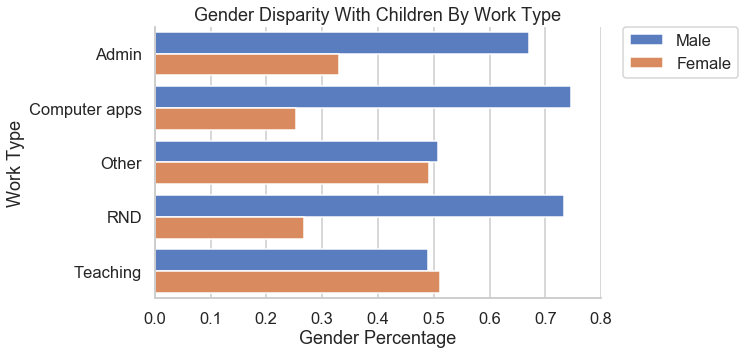

In [17]:
#find gender percentage in work types
df_wc_gender = df_child.groupby('WORK')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_wc_gender_melt = pd.melt(df_wc_gender, id_vars ='WORK')

#plot percentage of gender in specifi work type
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(y='WORK', x='value', 
            data=df_wc_gender_melt, 
            hue='GENDERS', hue_order=['Male','Female'], 
            ax=ax, palette="muted")
plt.title('Gender Disparity With Children By Work Type')
plt.xlabel('Gender Percentage')
plt.ylabel('Work Type')
plt.xlim(0,0.8)
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

A little over 50% of women with children are teachers, whereas approximately 75% of men with children work with technology and/or research and development. This plot is consistent with and corraborates with the previous plot, confirming that men and women with children have completely different job titles.

# Question 9: What size of employment do women with children tend to work at?

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametri

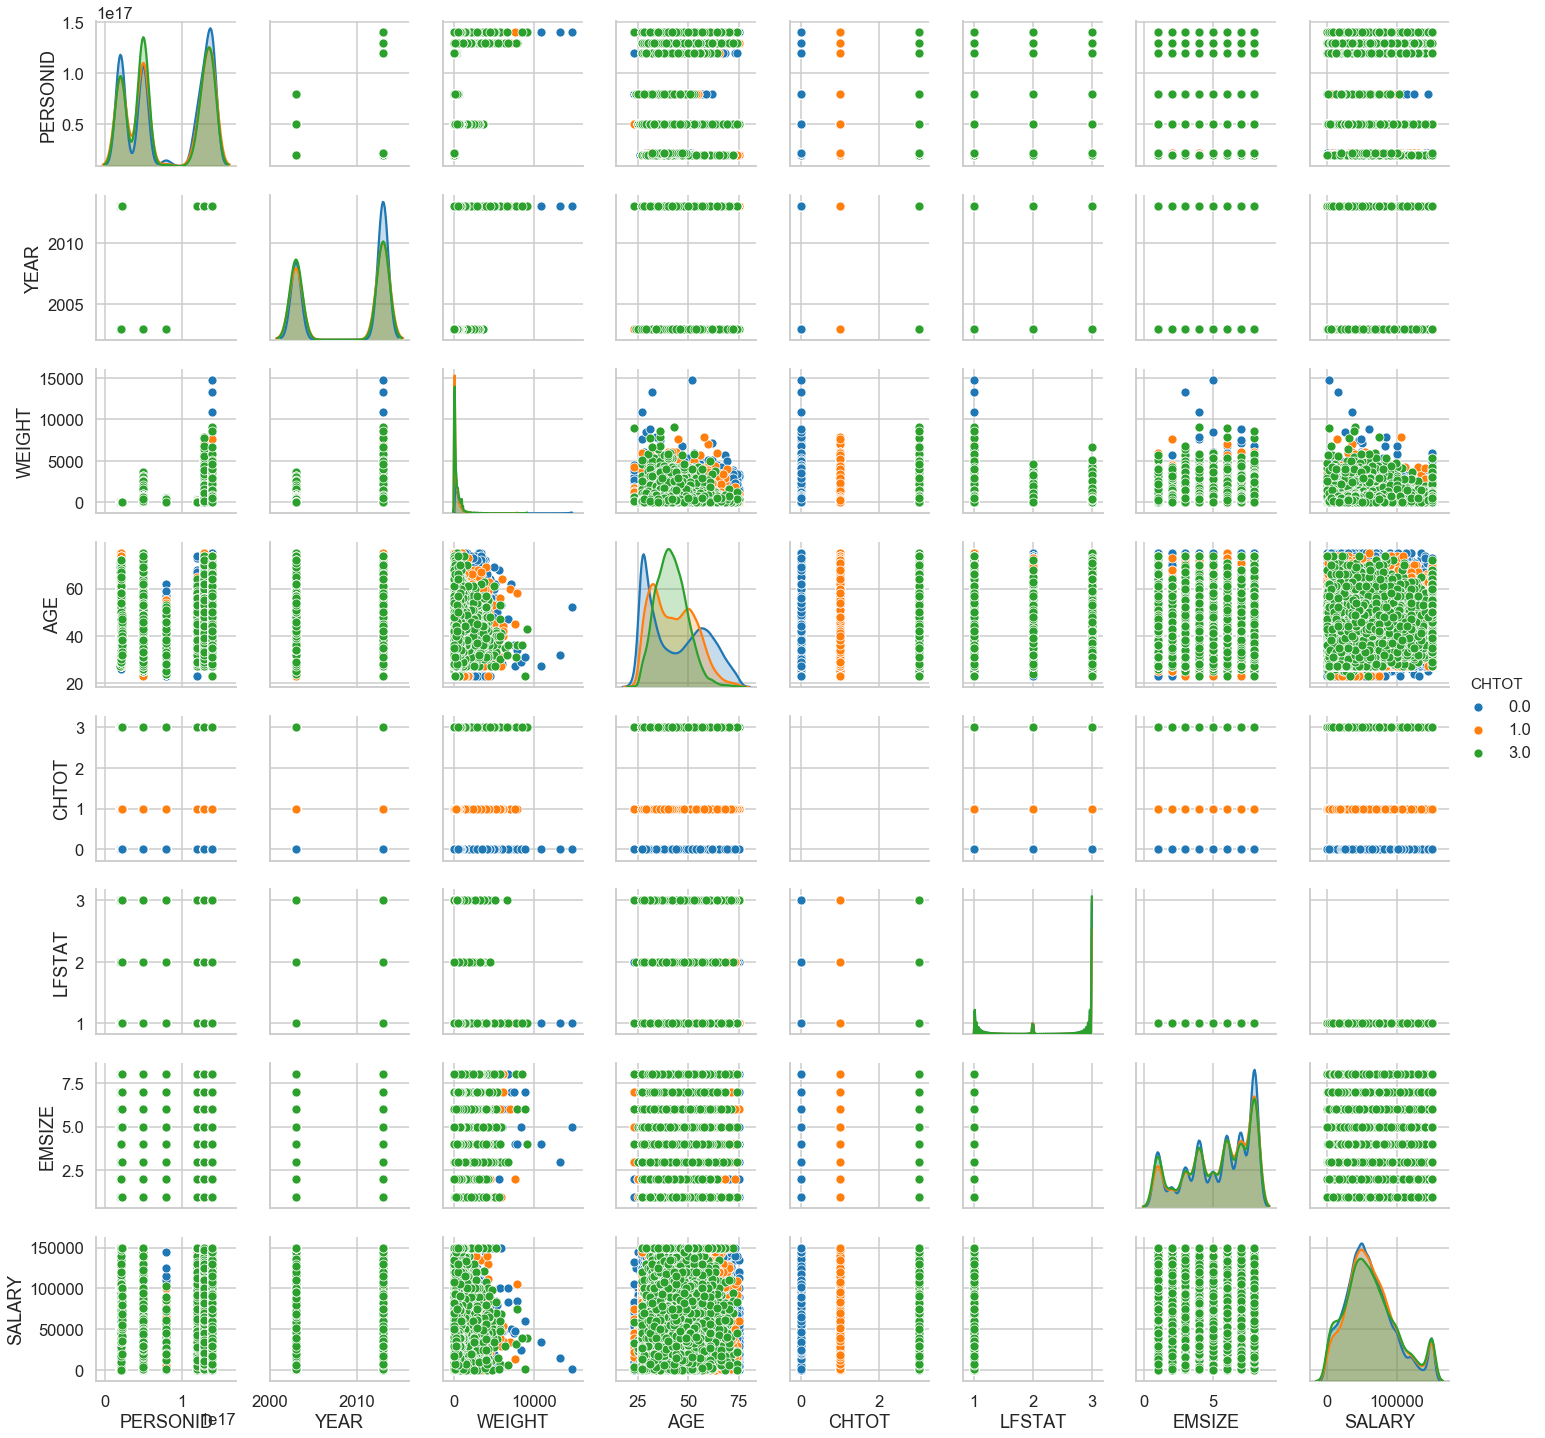

In [18]:
#plot to see how having children relate to other columns in df
sns.pairplot(data=df[df['GENDERS']=='Female'], hue='CHTOT')

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Women with children vs employment size')

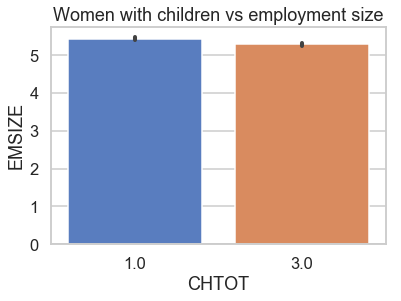

In [19]:
#Find only women with children and the employee size they reported.
wwc = df_child[df_child['GENDERS']=='Female']
data = pd.concat([wwc['CHTOT'], wwc['EMSIZE']], axis=1)

sns.barplot(data=data, x='CHTOT', y='EMSIZE', palette='muted')
plt.title('Women with children vs employment size')

Based on the pairplot and barplot above, we see that women with 1 or more children tend to work in companies with 1000 employees or less. See https://highered.ipums.org/highered-action/downloads/extract_files/highered_00005.cbk for detailed description. 

# Question 10: What is the salary distribution of each company size?

In [20]:
#use string data to replace numerical data
emsize_map = {1:'<10',2:'25',3:'100',4:'500', 5:'1000', 6:'5000', 7:'25000', 8:'>25000'}
df['EMSIZES'] = df['EMSIZE'].map(emsize_map)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

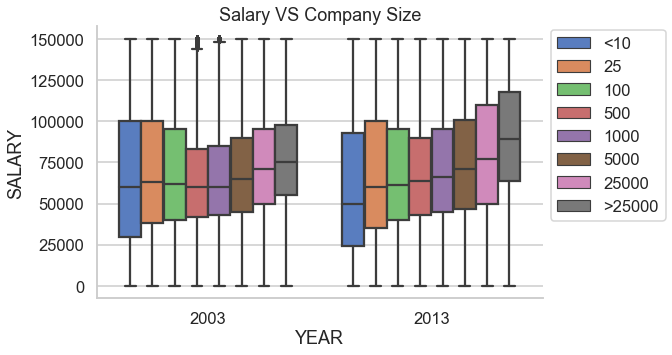

In [21]:
#plot salary distributed across company sizes
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.boxplot(data=df, 
            y = 'SALARY', x = 'YEAR', 
            hue = 'EMSIZES',hue_order=['<10', '25', '100', '500', '1000', '5000', '25000', '>25000'], 
            palette="muted", ax=ax)
sns.despine()
plt.title('Salary VS Company Size')
lgd=ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.2)
plt.tight_layout

In 2003, individuals working in companies with 25 or less employees and those with more than 25000 are more likely to make at most six figures. In 2013, we notice that the only major increase in salary is for individuals working for very large corporations. The question prior to this one established that women with children work in companies with 1000 employees or less. Here we see that employment sizes with 1000 or less pays a median of approximately $60,000. 

# Quesiton 11: What percentage of men and women with children are in supervisory roles?

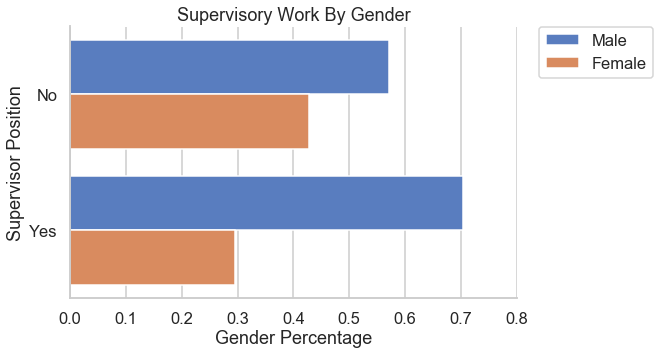

In [22]:
#find gender percentage by supervisory position
df_sup_gender = df_child.groupby('SUPERVISORY')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_sup_gender_melt = pd.melt(df_sup_gender, id_vars ='SUPERVISORY')

#plot supervisory role by gender
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(y='SUPERVISORY', x='value', 
            data=df_sup_gender_melt, 
            hue='GENDERS', hue_order=['Male','Female'], 
            ax=ax, palette="muted")
plt.title('Supervisory Work By Gender')
plt.xlabel('Gender Percentage')
plt.ylabel('Supervisor Position')
plt.xlim(0,0.8)
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

Men with children are more than two times more likely to have a supervisory role compared to women with children. However, more men with children are also more likely to not have a supervisory role.

# Question 12: What percentage of men and women with children leave their job due to family reasons?

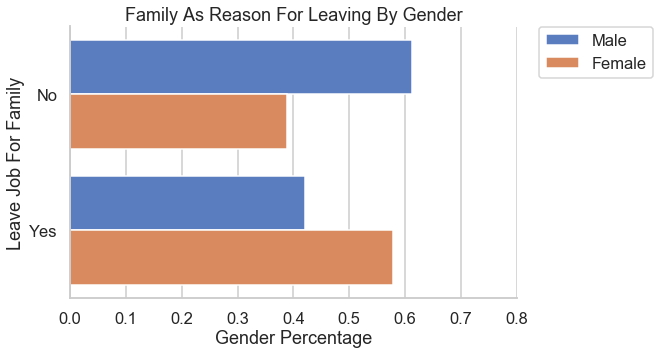

In [23]:
#find gender percentage by family as reason for leaving job.
df_fam_gender = df_child.groupby('FAMILY')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_fam_gender_melt = pd.melt(df_fam_gender, id_vars ='FAMILY')

#plot percentage of men and women with children who leave their job for family reasons
fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(y='FAMILY', x='value', 
            data=df_fam_gender_melt, 
            hue='GENDERS', hue_order=['Male','Female'], 
            ax=ax, palette="muted")
plt.title('Family As Reason For Leaving By Gender')
plt.xlabel('Gender Percentage')
plt.ylabel('Leave Job For Family')
plt.xlim(0,0.8)
lgd=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

Women with children are more likely to leave their job for family reasons. Men are less likely to do the same.

In [24]:
df_gender_employ = df.groupby(['YEAR','GENDERS'])['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [25]:
LFW_map = {1: 0.0, 2: 1.0, 3: np.NaN}

df['LFSTATW'] = df['LFSTAT'].map(LFW_map)
#only consider the data in the labor force
df_inlf_only = df.dropna(subset=['LFSTATW'])

df_inlf_only['weighted_lfstats']=df_inlf_only['WEIGHT']*df_inlf_only['LFSTATW']

weighted_lfs = df_inlf_only.groupby(['YEAR','GENDERS'])[['weighted_lfstats']].sum().unstack().reset_index()
weight = df_inlf_only.groupby(['YEAR','GENDERS'])[['WEIGHT']].sum().unstack().reset_index()
female_unemployed_rate = weighted_lfs['weighted_lfstats']['Female']/weight['WEIGHT']['Female']
male_unemployed_rate = weighted_lfs['weighted_lfstats']['Male']/weight['WEIGHT']['Male']
d = {'Year': [2003, 2013], 'female': female_unemployed_rate, 'male': male_unemployed_rate}
df_unemployed_rate_weighted = pd.DataFrame(data=d)
#melt the data frame to get ready for seaborn barplot with hues
df_unemployed_rate_weighted_melt = pd.melt(df_unemployed_rate_weighted, id_vars=['Year'], value_vars=['female', 'male'])

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


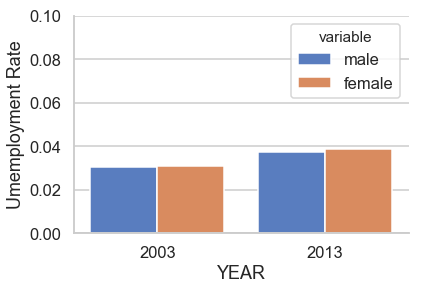

In [26]:
sns.barplot(x='Year', y='value', hue='variable', data = df_unemployed_rate_weighted_melt, hue_order=['male','female'],palette="muted")
plt.xlabel('YEAR')
plt.ylim([0,0.1])
plt.ylabel('Umemployment Rate')
sns.despine()

# Question 13: What is gender unempolyment rate between those without children and those with children?

In [27]:
#sparate df into those without and with children
df_nochild = df[(df['CHTOT'] == 0)]
df_withchild = df[(df['CHTOT'] == 1) | (df['CHTOT']==3)]

In [29]:
employ_nochild = df_nochild.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_nochild_melt = pd.melt(employ_nochild.reset_index(), id_vars ='GENDERS')
employed_nochild_melt_e = employ_nochild_melt[employ_nochild_melt['LFSTATS']=='Unemployed']
employed_nochild_melt_e['CHTOT'] = 0

employ_withchild = df_withchild.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_withchild_melt = pd.melt(employ_withchild.reset_index(), id_vars ='GENDERS')
employed_withchild_melt_e = employ_withchild_melt[employ_withchild_melt['LFSTATS']=='Unemployed']
employed_withchild_melt_e['CHTOT'] = 1 | 3

employed_new = pd.concat([employed_nochild_melt_e,employed_withchild_melt_e])

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(23.5,0.5,'Umemployment Rate')

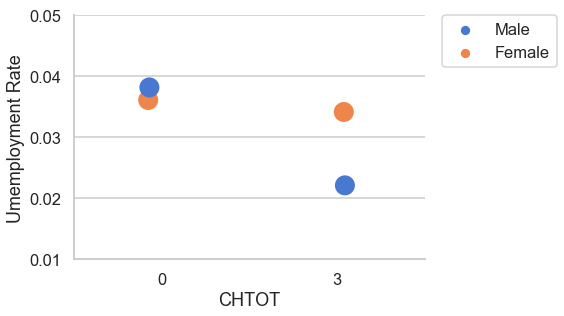

In [30]:
plt.figure(figsize=(8,4.5))
sns.stripplot(x='CHTOT', y='value', data=employed_new, hue='GENDERS', hue_order=['Male','Female'], size =20, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylim([0.01,0.05])
plt.ylabel('Umemployment Rate')

Unemployment rate for men and women without children are almost equal to each other. When men have children, their unemployment rate decreased; whereas women with children remained the same as those without children.

# Conclusion
In this notebook a quick data visualization of how women with children fare in the STEM job market was analyzed. Here are a few highlighted points:

1. There is an apparent gender pay gap observed from this survey despite having the same creditials, working in sectors, and having the same number of children.
2. Women with children get paid the same amount as women without children.
3. Men and women with children work in different industries that pay at opposite extremes of the salary range spectrum.
4. Men with children are more likely to be supervisors than women with children.
5. Women with children are more likely to leave their jobs for family than men with children.